In [122]:
#Importer les bibliothéques nécessaires 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline  import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

## Concaténer tous les fichier csv dans un seul DataFrame

In [123]:
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_column', 41)
# Récupérez une liste de tous les fichiers dans le dossier
filenames = os.listdir("transactions-ser")

# Filtrez la liste pour ne conserver que les fichiers CSV
csv_filenames = [f for f in filenames if f.endswith(".csv")]

# Créez une liste vide pour stocker les objets DataFrame
df_list = []

# Pour chaque fichier CSV, ouvrez-le et ajoutez son contenu à la liste
for filename in csv_filenames:
    df_list.append(pd.read_csv('transactions-ser/' + filename,sep=";"))

# Concaténez les DataFrame
df = pd.concat(df_list)
df.to_csv("output.csv", index=False)

In [124]:
#on affiche le dataframe
df


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,3,Dépendance,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0023,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,3,Dépendance,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0053,None,None,None,None,None,None,None,None,None,None,None,None,0,4,Local industriel. commercial ou assimilé,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW
14,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0002,None,None,None,None,None,None,None,None,None,None,None,None,0,2,Appartement,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
15,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0002,None,None,None,None,None,None,None,None,None,None,None,None,0,4,Local industriel. commercial ou assimilé,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
16,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0094,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW


In [125]:
#on traite que les donneés dans le type_local est égale à Maison ou bien appartement c'est ce qu'était demandé
df=df.loc[(df['type_local']=='Maison') | (df['type_local']=='Appartement')] 

In [126]:
#on affiche notre nouvelle dataframe
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0023,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
5,2020-1061542,2020-03-10,1,Vente,200000.0,2.0,None,RUE DU MADRILLET,1580,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0090,None,None,None,None,None,None,None,None,None,None,None,None,0,2,Appartement,18.0,1.0,S,sols,None,None,105.0,1.074902,49.403036,000AB
7,2019-1116084,2019-08-28,1,Vente,180000.0,28.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0066,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,108.0,5.0,S,sols,None,None,348.0,1.071647,49.401956,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2017-544056,2017-09-08,1,Vente,262500.0,5.0,None,RUE PIERRE JEAN DE BERANGER,1335,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BV0213,None,None,None,NaN,None,None,None,None,None,None,None,None,0,1,Maison,102.0,5.0,S,sols,None,None,434.0,1.069653,49.399310,000BV
232,2017-544305,2017-09-08,1,Vente,130000.0,25.0,None,RUE LAMARTINE,1420,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BV0101,None,None,None,NaN,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,369.0,1.072534,49.400600,000BV
233,2017-544006,2017-09-01,1,Vente,189300.0,20.0,None,RUE PAUL BERT,1870,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BV0597,None,None,None,NaN,None,None,None,None,None,None,None,None,0,1,Maison,80.0,4.0,S,sols,None,None,354.0,1.071759,49.399769,000BV
234,2017-543020,2017-07-07,1,Vente,161000.0,4.0,None,RUE ERNEST RENAN,0780,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BV0576,None,None,5,143.3,None,None,None,None,None,None,None,None,1,2,Appartement,143.0,4.0,None,None,None,None,NaN,1.073465,49.398776,000BV


# 1.Explorer les données 
## Objectif:
     .Comprendre mieux les données pour avoir une meilleur intérpretation.
 ## Analyse des lignes et colonnes :
     .Variable target: valeur_fonciere.
     .Lignes et colonnes :1478,41 
     .types de variables: quantitatives 22(float=18,int=4),qualitatives 19
     .Analyse des valeurs manquantes : 33,33%

## Anayse et visualisation des données

In [127]:
#on copie notre dataframe pour travailler sur ce dernier
data=df.copy()

In [128]:
#on affiche la taille du dataframe
data.shape

(1478, 41)

In [129]:
#on replace les valeur qui valent None par nan 
data=data.replace(to_replace='None', value=np.nan)

In [130]:
data.head(10)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,NaN,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Maison,129.0,4.0,S,sols,NaN,NaN,351.0,1.071855,49.401886,000AB
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,NaN,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Maison,64.0,4.0,S,sols,NaN,NaN,452.0,1.070963,49.402764,000AB
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,NaN,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Maison,64.0,4.0,S,sols,NaN,NaN,498.0,1.070475,49.403622,000AB
5,2020-1061542,2020-03-10,1,Vente,200000.0,2.0,NaN,RUE DU MADRILLET,1580,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,Appartement,18.0,1.0,S,sols,NaN,NaN,105.0,1.074902,49.403036,000AB
7,2019-1116084,2019-08-28,1,Vente,180000.0,28.0,NaN,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Maison,108.0,5.0,S,sols,NaN,NaN,348.0,1.071647,49.401956,000AB
8,2019-1114082,2019-06-14,1,Vente,188000.0,38.0,NaN,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Maison,74.0,5.0,S,sols,NaN,NaN,377.0,1.070502,49.402256,000AB
10,2018-1035494,2018-10-18,1,Vente,147000.0,26.0,NaN,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Maison,64.0,4.0,S,sols,NaN,NaN,499.0,1.071141,49.402320,000AB
11,2018-1034872,2018-09-21,1,Vente,136000.0,19.0,NaN,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Maison,64.0,4.0,S,sols,NaN,NaN,453.0,1.071604,49.402748,000AB
12,2018-1035039,2018-09-14,1,Vente,820000.0,1.0,A,AV DES CANADIENS,380,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,Appartement,77.0,3.0,S,sols,NaN,NaN,2847.0,1.067422,49.403732,000AB
14,2018-1033927,2018-07-27,1,Vente,125000.0,18.0,NaN,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,NaN,NaN,76575000AB0038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,Maison,77.0,5.0,S,sols,NaN,NaN,537.0,1.070309,49.402548,000AB


In [131]:
#on compte le nombre des types de valeurs
data.dtypes.value_counts()

object     19
float64    18
int64       4
dtype: int64

In [132]:
#pourcentage des valeurs manquantes
np.mean(data.dtypes.value_counts('None'))

0.3333333333333333

<AxesSubplot:>

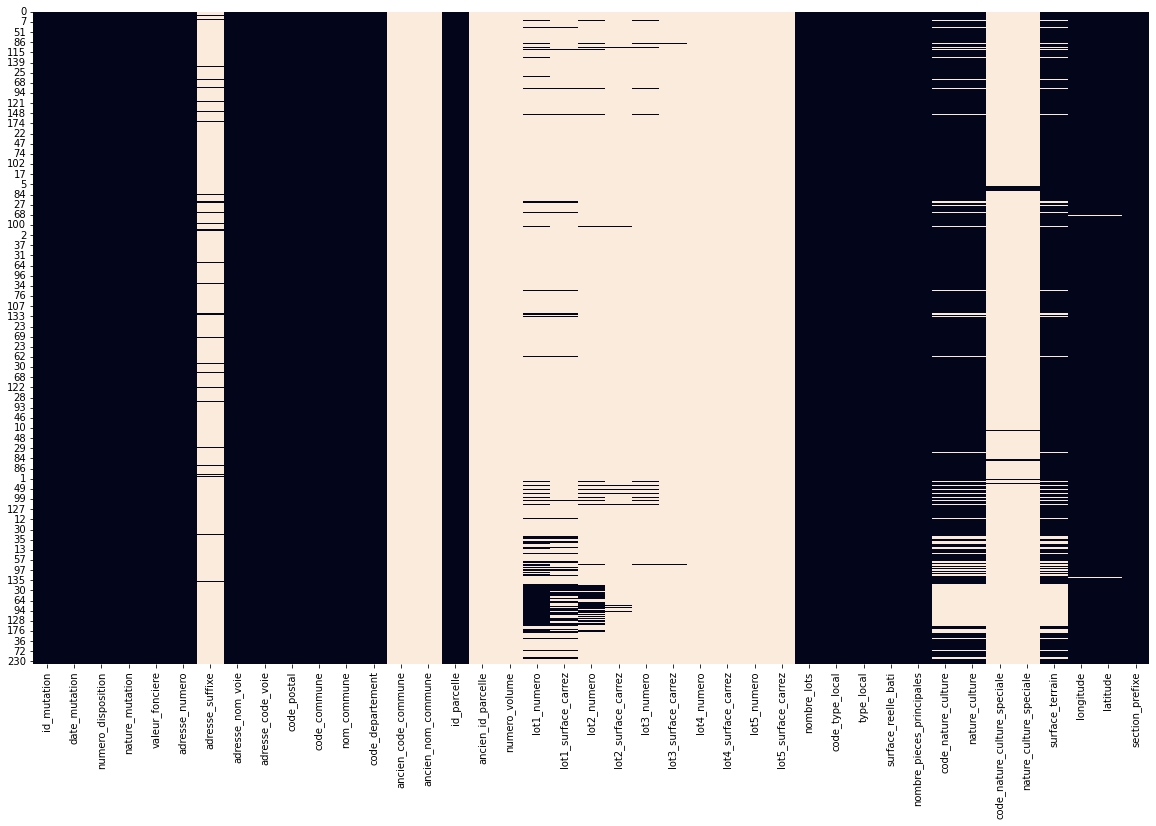

In [133]:
#on vsualise les valeur qui sont à non dans chaque colonne
plt.figure(figsize=(20,12))
sns.heatmap(data.isna(),cbar=False)

In [134]:
#on affiche le pourcentage des valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

id_mutation                     0.000000
nombre_pieces_principales       0.000000
surface_reelle_bati             0.000000
type_local                      0.000000
code_type_local                 0.000000
nombre_lots                     0.000000
id_parcelle                     0.000000
code_departement                0.000000
nom_commune                     0.000000
code_commune                    0.000000
section_prefixe                 0.000000
adresse_code_voie               0.000000
adresse_nom_voie                0.000000
date_mutation                   0.000000
numero_disposition              0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
code_postal                     0.000000
adresse_numero                  0.000677
longitude                       0.003383
latitude                        0.003383
surface_terrain                 0.158322
nature_culture                  0.158322
code_nature_culture             0.158322
lot1_numero     

In [135]:
#on supprime les colone qui ont un pourcentage de valeur manquante superieur à 80%
data=data[data.columns[data.isna().sum()/data.shape[0] < 0.8]]
data.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,section_prefixe
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,76575000AB0065,0,1,Maison,129.0,4.0,S,sols,351.0,1.071855,49.401886,000AB
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,76575000AB0023,0,1,Maison,64.0,4.0,S,sols,452.0,1.070963,49.402764,000AB
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,76575000AB0012,0,1,Maison,64.0,4.0,S,sols,498.0,1.070475,49.403622,000AB
5,2020-1061542,2020-03-10,1,Vente,200000.0,2.0,RUE DU MADRILLET,1580,76800,76575,Saint-Étienne-du-Rouvray,76,76575000AB0090,0,2,Appartement,18.0,1.0,S,sols,105.0,1.074902,49.403036,000AB
7,2019-1116084,2019-08-28,1,Vente,180000.0,28.0,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,76575000AB0066,0,1,Maison,108.0,5.0,S,sols,348.0,1.071647,49.401956,000AB


In [136]:
#la nouvelle taille de notre data frame
data.shape

(1478, 24)

<AxesSubplot:>

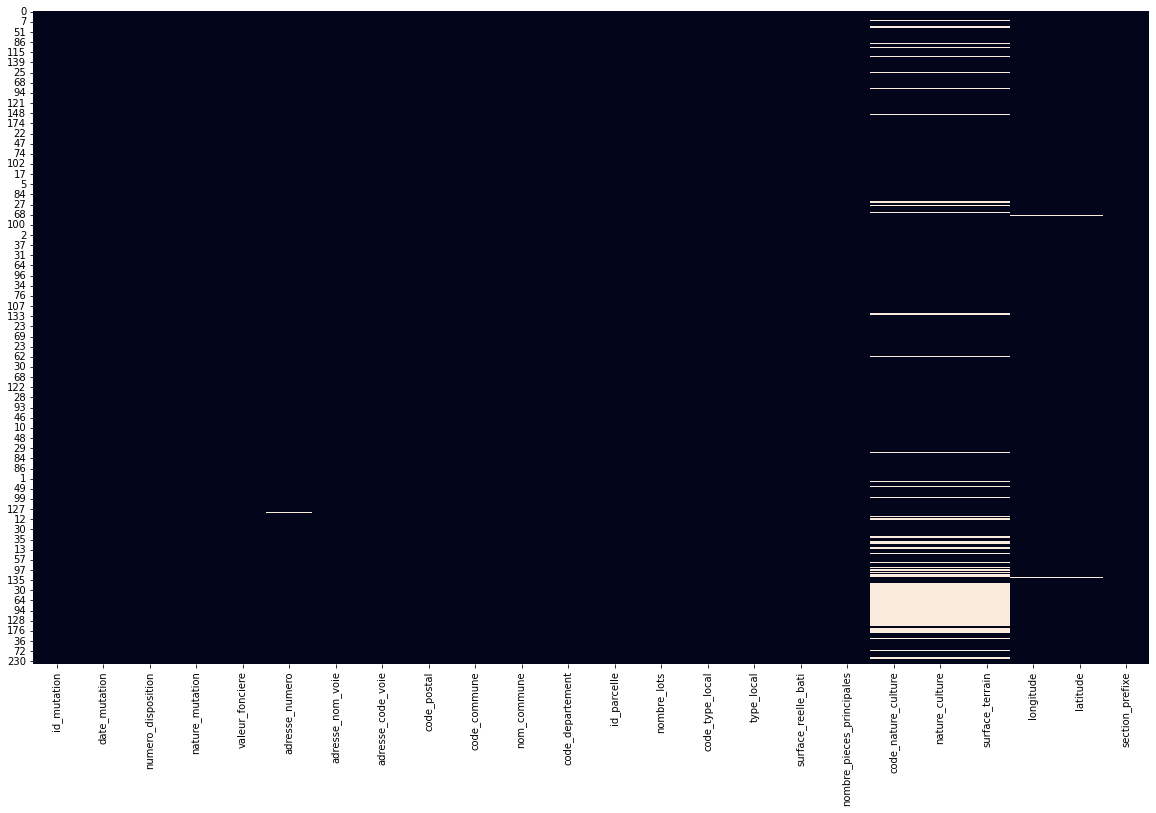

In [137]:
#on vsualise les valeur qui sont à non dans chaque colonne
plt.figure(figsize=(20,12))
sns.heatmap(data.isna(),cbar=False)

## variable Qualitatives

In [138]:
#on affiches les type des variables object
for c in data.select_dtypes('object'):
    print(f'{c:-<50} {data[c].unique()}')

id_mutation--------------------------------------- ['2022-360375' '2021-1180016' '2021-1177880' ... '2017-544006'
 '2017-543020' '2018-1037104']
date_mutation------------------------------------- ['2022-04-21' '2021-05-10' '2021-01-14' '2020-03-10' '2019-08-28'
 '2019-06-14' '2018-10-18' '2018-09-21' '2018-09-14' '2018-07-27'
 '2018-07-05' '2018-06-29' '2018-04-19' '2017-09-27' '2022-06-01'
 '2022-05-25' '2022-03-18' '2021-11-30' '2021-10-27' '2021-10-22'
 '2021-10-20' '2021-10-14' '2021-09-30' '2021-08-27' '2021-08-19'
 '2021-08-17' '2021-08-02' '2021-07-19' '2021-07-16' '2021-07-15'
 '2021-07-09' '2021-06-18' '2021-05-31' '2021-05-12' '2021-05-11'
 '2021-05-07' '2021-04-26' '2021-03-26' '2021-03-11' '2021-03-10'
 '2021-03-04' '2021-02-01' '2021-01-19' '2021-01-11' '2020-12-15'
 '2020-11-27' '2020-11-26' '2020-10-27' '2020-10-07' '2020-10-05'
 '2020-10-01' '2020-09-22' '2020-09-16' '2020-08-28' '2020-08-18'
 '2020-08-06' '2020-08-03' '2020-07-23' '2020-07-02' '2020-05-20'
 '2020-05-18

In [139]:
#on supprime les colonnes qui ont une seul valeur qualitatives
data=data.drop(['id_mutation','code_postal','nom_commune','id_parcelle','code_postal'],axis=1)

## Histogramme des variables continue 

C:\Users\Briane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Briane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Briane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

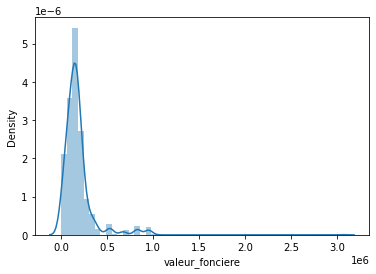

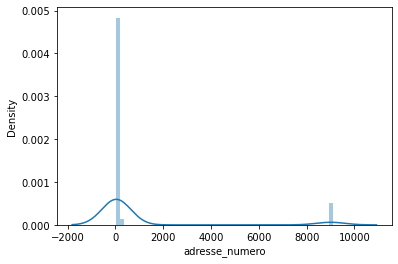

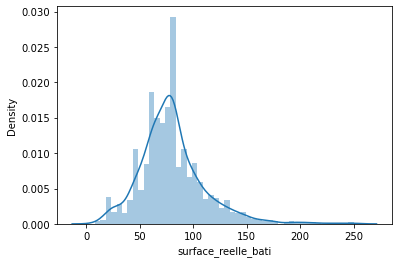

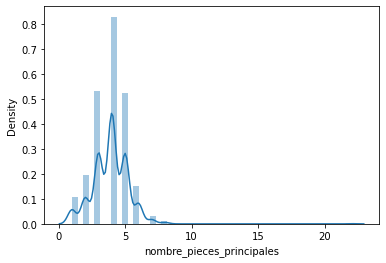

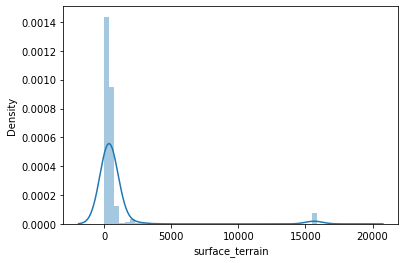

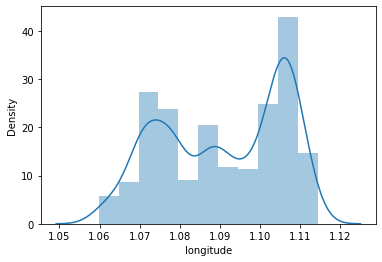

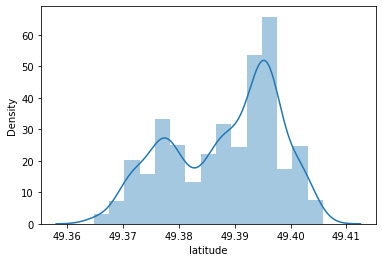

In [140]:
#pour les floats
for c in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[c])

## remarque :
la longitude et la latitude on des petit écarts et on sait qu'on est dans la meme commune donc on peut les supprimer et travailler qu'avec les zone

C:\Users\Briane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Briane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Briane\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Briane\anaconda3\lib\site-packages\seaborn\distribution

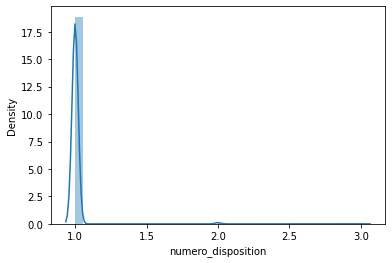

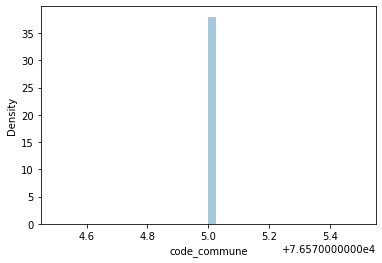

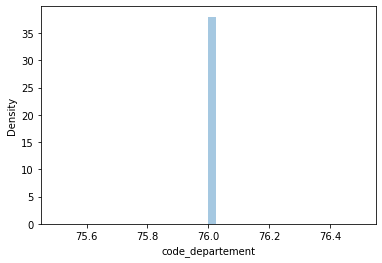

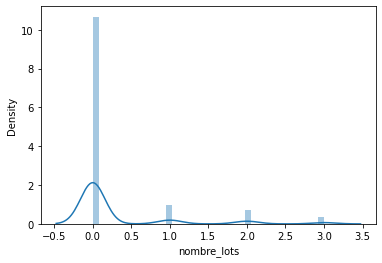

In [141]:
#les histohgrammes pour les entiers
for c in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(df[c])

In [142]:
for c in data.select_dtypes('int'):
    print(f'{c:-<50} {data[c].unique()}')

numero_disposition-------------------------------- [1 2 3]
code_commune-------------------------------------- [76575]
code_departement---------------------------------- [76]
nombre_lots--------------------------------------- [0 3 1 2]


In [143]:
#on supprime ceux qui ont une seule valeur
data=data.drop(['code_commune','code_departement'],axis=1)
data

,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,section_prefixe
0,2022-04-21,1,Vente,260000.0,26.0,RUE DELILLE,582,0,1,Maison,129.0,4.0,S,sols,351.0,1.071855,49.401886,000AB
2,2021-05-10,1,Vente,160000.0,13.0,RUE ALFRED DE MUSSET,40,0,1,Maison,64.0,4.0,S,sols,452.0,1.070963,49.402764,000AB
3,2021-01-14,1,Vente,174000.0,21.0,RUE PAUL VERLAINE,1920,0,1,Maison,64.0,4.0,S,sols,498.0,1.070475,49.403622,000AB
5,2020-03-10,1,Vente,200000.0,2.0,RUE DU MADRILLET,1580,0,2,Appartement,18.0,1.0,S,sols,105.0,1.074902,49.403036,000AB
7,2019-08-28,1,Vente,180000.0,28.0,RUE DELILLE,582,0,1,Maison,108.0,5.0,S,sols,348.0,1.071647,49.401956,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2017-09-08,1,Vente,262500.0,5.0,RUE PIERRE JEAN DE BERANGER,1335,0,1,Maison,102.0,5.0,S,sols,434.0,1.069653,49.399310,000BV
232,2017-09-08,1,Vente,130000.0,25.0,RUE LAMARTINE,1420,0,1,Maison,64.0,4.0,S,sols,369.0,1.072534,49.400600,000BV
233,2017-09-01,1,Vente,189300.0,20.0,RUE PAUL BERT,1870,0,1,Maison,80.0,4.0,S,sols,354.0,1.071759,49.399769,000BV
234,2017-07-07,1,Vente,161000.0,4.0,RUE ERNEST RENAN,0780,1,2,Appartement,143.0,4.0,NaN,NaN,NaN,1.073465,49.398776,000BV


## relation

In [144]:
#on crée une autre colonne avec l 'année de mutation seulement 
data['date_mutation']=pd.to_datetime(data["date_mutation"])
data = data.assign(année_muation=data["date_mutation"].dt.year)


In [145]:
#on supprime la colonne avec la date de mutation 
data=data.drop(['date_mutation'],axis=1)
data

,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,section_prefixe,année_muation
0,1,Vente,260000.0,26.0,RUE DELILLE,582,0,1,Maison,129.0,4.0,S,sols,351.0,1.071855,49.401886,000AB,2022
2,1,Vente,160000.0,13.0,RUE ALFRED DE MUSSET,40,0,1,Maison,64.0,4.0,S,sols,452.0,1.070963,49.402764,000AB,2021
3,1,Vente,174000.0,21.0,RUE PAUL VERLAINE,1920,0,1,Maison,64.0,4.0,S,sols,498.0,1.070475,49.403622,000AB,2021
5,1,Vente,200000.0,2.0,RUE DU MADRILLET,1580,0,2,Appartement,18.0,1.0,S,sols,105.0,1.074902,49.403036,000AB,2020
7,1,Vente,180000.0,28.0,RUE DELILLE,582,0,1,Maison,108.0,5.0,S,sols,348.0,1.071647,49.401956,000AB,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1,Vente,262500.0,5.0,RUE PIERRE JEAN DE BERANGER,1335,0,1,Maison,102.0,5.0,S,sols,434.0,1.069653,49.399310,000BV,2017
232,1,Vente,130000.0,25.0,RUE LAMARTINE,1420,0,1,Maison,64.0,4.0,S,sols,369.0,1.072534,49.400600,000BV,2017
233,1,Vente,189300.0,20.0,RUE PAUL BERT,1870,0,1,Maison,80.0,4.0,S,sols,354.0,1.071759,49.399769,000BV,2017
234,1,Vente,161000.0,4.0,RUE ERNEST RENAN,0780,1,2,Appartement,143.0,4.0,NaN,NaN,NaN,1.073465,49.398776,000BV,2017


## enumerer les données qualitatives 

In [146]:
def encodage(df):
    code = {'Vente':0,
            'Adjudication':1,
            "Vente en l'état futur d'achèvement":2,
            'Maison':0,
            'Appartement':1,
            'S':0,
            'AG':1,
            'J':2,
            'L':3,
            'AB':4,
            'sols':0,
            "terrains d'agrément":1,
            'jardins':2,
            'landes':3,
            'Terrain à bâtir':4,
           '1':1,
           '2':2,
           '000AB':0, '000AC':1, '000AD':2, '000AE':3, '000AH':4, '000AI':5, 
            '000AK':6, '000AO':7, '000AP':8,'000AR':9, '000AS':10, '000AT':11,
            '000AV':12, '000AW':13 ,'000AX':14, '000AY':15, '000AZ':16,
            '000BC':17,'000BD':18, '000BE':19, '000BH':20, '000BK':21,
            '000BL':22,
            '000BM':23,
            '000BO':24,
            '000BP':25,
            '000BR':26,
 '000BS':27, '000BT':28, '000BV':29,'000BW':30}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [147]:
#on transforme les valeurs qaulitative en valeurs quantitatives pour visualiser la corrélation entre les different descripteurs 
data[['nature_mutation','type_local','code_nature_culture','code_type_local','nature_culture','section_prefixe']]=encodage(data[['nature_mutation','type_local','code_nature_culture','code_type_local','nature_culture','section_prefixe']])

C:\Users\Briane\AppData\Local\Temp\ipykernel_9128\1485905407.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = df[col].map(code)
C:\Users\Briane\AppData\Local\Temp\ipykernel_9128\1485905407.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = df[col].map(code)
C:\Users\Briane\AppData\Local\Temp\ipykernel_9128\1485905407.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [148]:
#notre nouvelle dataframe
data

,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,section_prefixe,année_muation
0,1,0,260000.0,26.0,RUE DELILLE,582,0,1.0,0,129.0,4.0,0.0,0.0,351.0,1.071855,49.401886,0,2022
2,1,0,160000.0,13.0,RUE ALFRED DE MUSSET,40,0,1.0,0,64.0,4.0,0.0,0.0,452.0,1.070963,49.402764,0,2021
3,1,0,174000.0,21.0,RUE PAUL VERLAINE,1920,0,1.0,0,64.0,4.0,0.0,0.0,498.0,1.070475,49.403622,0,2021
5,1,0,200000.0,2.0,RUE DU MADRILLET,1580,0,2.0,1,18.0,1.0,0.0,0.0,105.0,1.074902,49.403036,0,2020
7,1,0,180000.0,28.0,RUE DELILLE,582,0,1.0,0,108.0,5.0,0.0,0.0,348.0,1.071647,49.401956,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1,0,262500.0,5.0,RUE PIERRE JEAN DE BERANGER,1335,0,1.0,0,102.0,5.0,0.0,0.0,434.0,1.069653,49.399310,29,2017
232,1,0,130000.0,25.0,RUE LAMARTINE,1420,0,1.0,0,64.0,4.0,0.0,0.0,369.0,1.072534,49.400600,29,2017
233,1,0,189300.0,20.0,RUE PAUL BERT,1870,0,1.0,0,80.0,4.0,0.0,0.0,354.0,1.071759,49.399769,29,2017
234,1,0,161000.0,4.0,RUE ERNEST RENAN,0780,1,2.0,1,143.0,4.0,NaN,NaN,NaN,1.073465,49.398776,29,2017


In [149]:
#on suprimme les colonnes qui ont la correlation 1 entre elle par ce que elle represente la meme chose ex( 	code_type_local et type_local avec  code_nature_culture et nature_culture)
data=data.drop(['type_local','nature_culture'],axis=1)
data#

,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude,section_prefixe,année_muation
0,1,0,260000.0,26.0,RUE DELILLE,582,0,1.0,129.0,4.0,0.0,351.0,1.071855,49.401886,0,2022
2,1,0,160000.0,13.0,RUE ALFRED DE MUSSET,40,0,1.0,64.0,4.0,0.0,452.0,1.070963,49.402764,0,2021
3,1,0,174000.0,21.0,RUE PAUL VERLAINE,1920,0,1.0,64.0,4.0,0.0,498.0,1.070475,49.403622,0,2021
5,1,0,200000.0,2.0,RUE DU MADRILLET,1580,0,2.0,18.0,1.0,0.0,105.0,1.074902,49.403036,0,2020
7,1,0,180000.0,28.0,RUE DELILLE,582,0,1.0,108.0,5.0,0.0,348.0,1.071647,49.401956,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1,0,262500.0,5.0,RUE PIERRE JEAN DE BERANGER,1335,0,1.0,102.0,5.0,0.0,434.0,1.069653,49.399310,29,2017
232,1,0,130000.0,25.0,RUE LAMARTINE,1420,0,1.0,64.0,4.0,0.0,369.0,1.072534,49.400600,29,2017
233,1,0,189300.0,20.0,RUE PAUL BERT,1870,0,1.0,80.0,4.0,0.0,354.0,1.071759,49.399769,29,2017
234,1,0,161000.0,4.0,RUE ERNEST RENAN,0780,1,2.0,143.0,4.0,NaN,NaN,1.073465,49.398776,29,2017


In [150]:
#on compte le nombre de valeur pour adresse_code_voie et adresse_nom_voie
data['adresse_code_voie'].value_counts()
data['adresse_nom_voie'].value_counts()

RUE DE PARIS                     52
RUE GAMBETTA                     51
RUE LAZARE CARNOT                50
RUE DE LA REPUBLIQUE             45
RUE PIERRE LUGAT                 37
RUE DOCTEUR COTONI               37
RUE DE L INDUSTRIE               29
IMM F CHATEAU BLANC              28
RUE PAUL LANGEVIN                25
IMMEUBLE ATLANTIDE               24
RUE DES HORTENSIAS               24
RES MIRABEAU TOUR 2              22
RUE JEAN PERRIN                  20
RUE PARMENTIER                   20
RES MIRABEAU TOUR 3              19
RUE LAMARTINE                    18
RUE DE FORT DE VAUX              15
RUE GENEVIEVE DE GAULLE          15
RUE MAURICE BLOT                 15
RUE JEAN DE LA FONTAINE          14
RUE DU MADRILLET                 14
RUE DES FUSILLES                 13
IMM H CHATEAU BLANC              13
RUE DE STOCKHOLM                 13
RES MIRABEAU TOUR 1              13
RUE JEAN RONDEAUX                12
RUE FELIX FAURE                  12
RUE HUBERT LATHAM           

In [151]:
#on affiche les valeurs de nos types object
for c in data.select_dtypes('object'):
    print(f'{c:-<50} {data[c].unique()}')

adresse_nom_voie---------------------------------- ['RUE DELILLE' 'RUE ALFRED DE MUSSET' 'RUE PAUL VERLAINE'
 'RUE DU MADRILLET' 'AV DES CANADIENS' 'RUE ANTONIN ARTAUD'
 'RUE JEAN PERRIN' 'RUE DE BUFFON' 'RUE MOLIERE' 'RUE RACINE'
 'RUE RASPAIL' 'RUE GUYNEMER' 'RUE PHILIPPE PINEL' 'RUE RENE LAENNEC'
 'RUE ROLAND GARROS' 'RUE JEAN DE LA FONTAINE' 'RUE JOLIOT CURIE'
 'RUE M BERTHELOT' 'RUE DOCTEUR CALMETTE' 'RUE MARIUS VALLEE'
 'RUE LOUIS BRAILLE' 'RUE BOIELDIEU' 'RUE MARX DORMOY' 'RUE DOCTEUR ROUX'
 'RUE HENRI BECQUEREL' 'RUE HUBERT LATHAM' 'RUE JOSEPH LE BRIX'
 'AV ANTOINE DE ST EXUPERY' 'RUE DES MARRONNIERS'
 'RUE LT VAISSEAU DE CUVERVILLE' 'RUE NUNGESSER ET COLI'
 'RUE JEAN MARIDOR' 'RUE JULES VEDRINES' 'RUE DES CERISIERS'
 'RUE PAUL DOUMER' 'RUE CAP FERBER' 'RUE HENRI FARMAN' 'RUE GEO CHAVEZ'
 'RUE CLAUDE PERCHOT' 'RUE DU CAP ARRACHARD' 'IMP DES NOISETIERS'
 'RUE A SANTOS DUMONT' 'RUE JEAN ASSOLANT' 'RUE DE STOCKHOLM'
 'RUE LOUIS BLERIOT' 'RUE BOSSOUTROT' 'RUE R ESNAULT DE PELTERIE'

In [152]:
#on remarque aussi que y 'as trop de valeur pour les 2 colonnes adresse_code_voie et adresse_nom_voie  
#leur correlation avec les autres coloness  est trop faibles donc on les suprrime aussi 
data=data.drop(['adresse_code_voie','adresse_nom_voie'],axis=1)


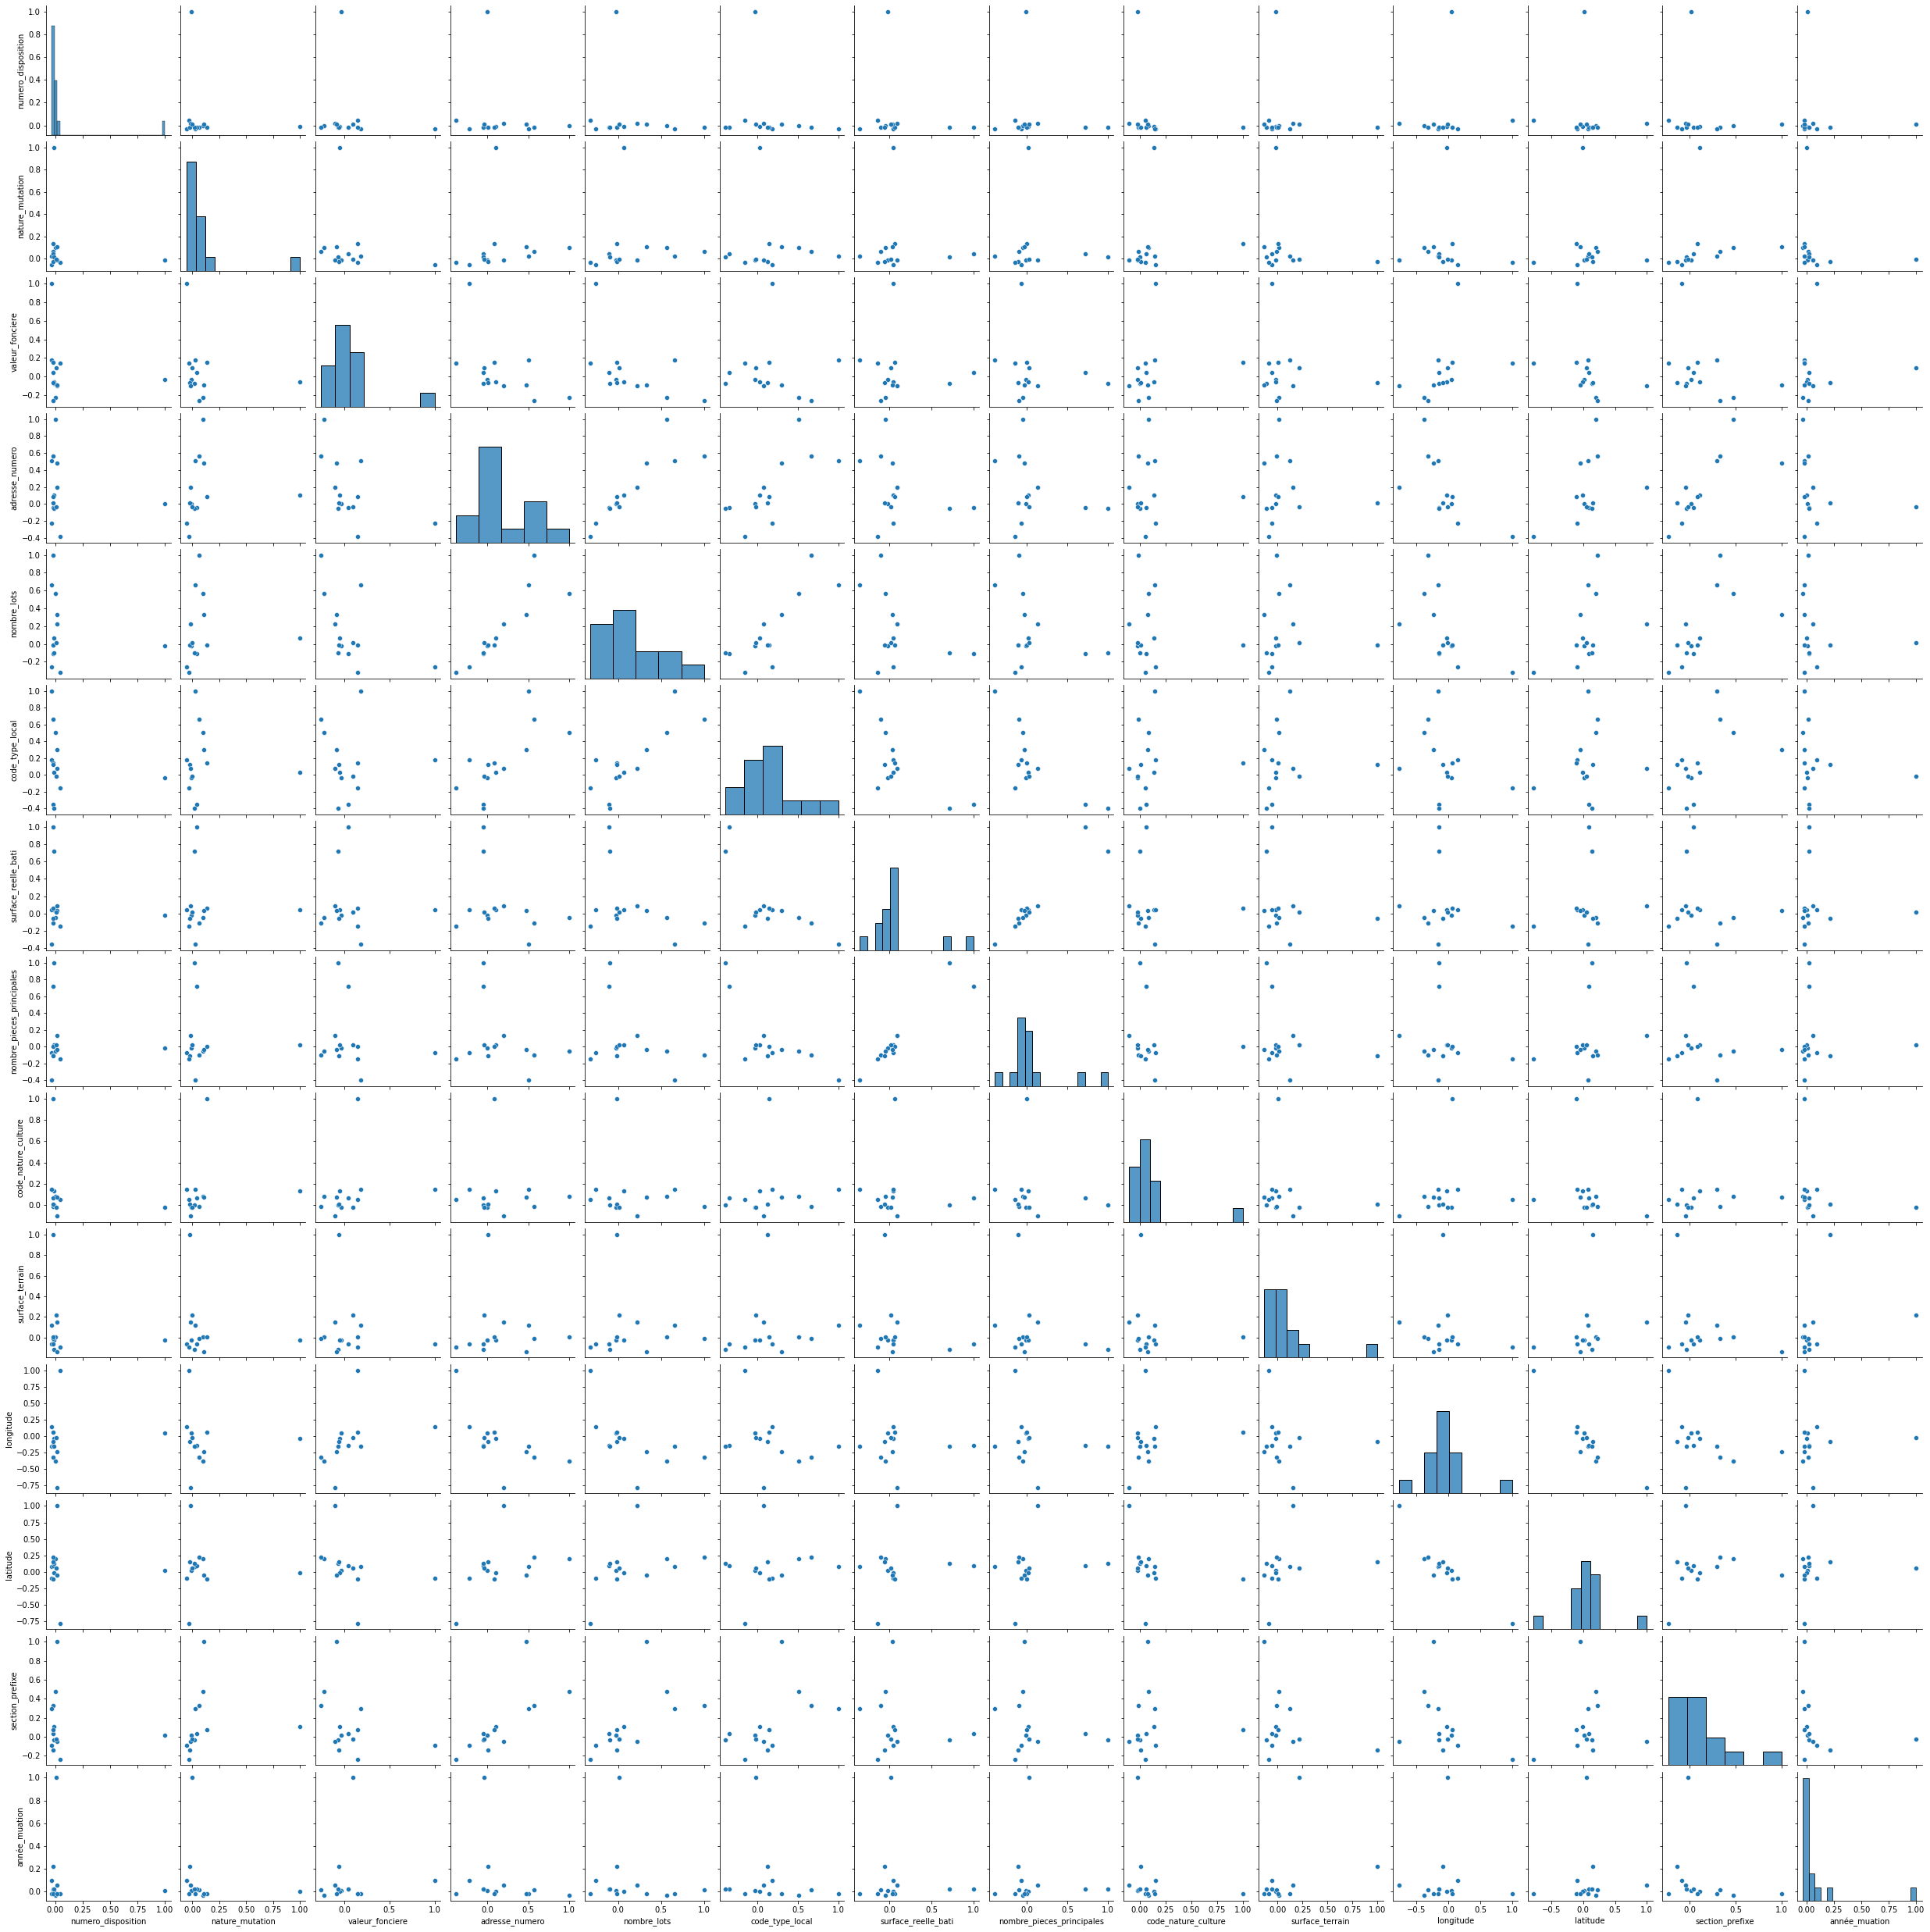

In [153]:
#onn affiche les corrélation et les plots entre les descripteurs 
sns.pairplot(data.corr())

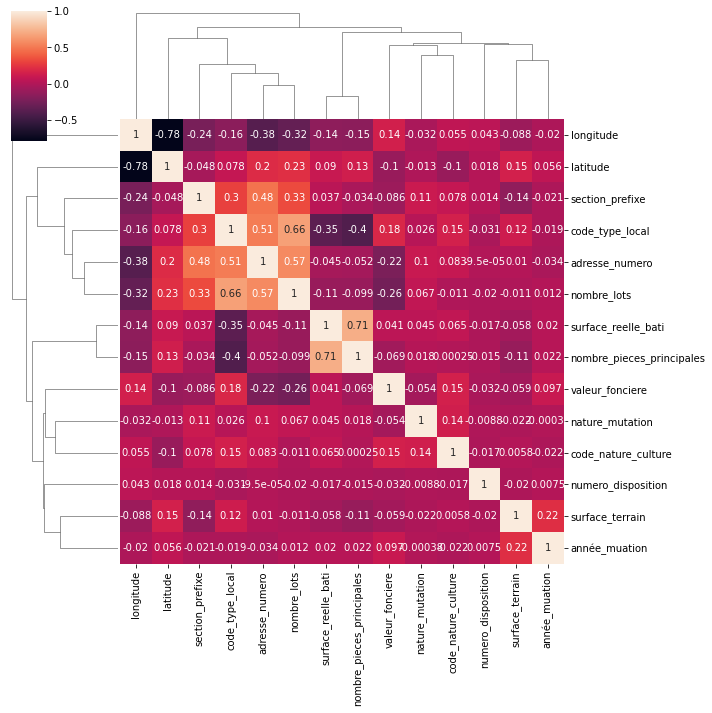

In [154]:
sns.clustermap(data.corr(),annot=True)

## Conclusion :
on remarque que il ne y'as pas de corrélation avec les valeur fonciere donc j'ai décidé de découper mon dataframe en deux type local maison et appartement pour voir s'il y a un difference 

In [155]:
#on devise notre data frame en 2 dataframe maison et appartement
maison=data[data['code_type_local']==1]
appartement=data[data['code_type_local']==2]
maison=maison.drop(['code_type_local'],axis=1)
appartement=appartement.drop(['code_type_local'],axis=1)

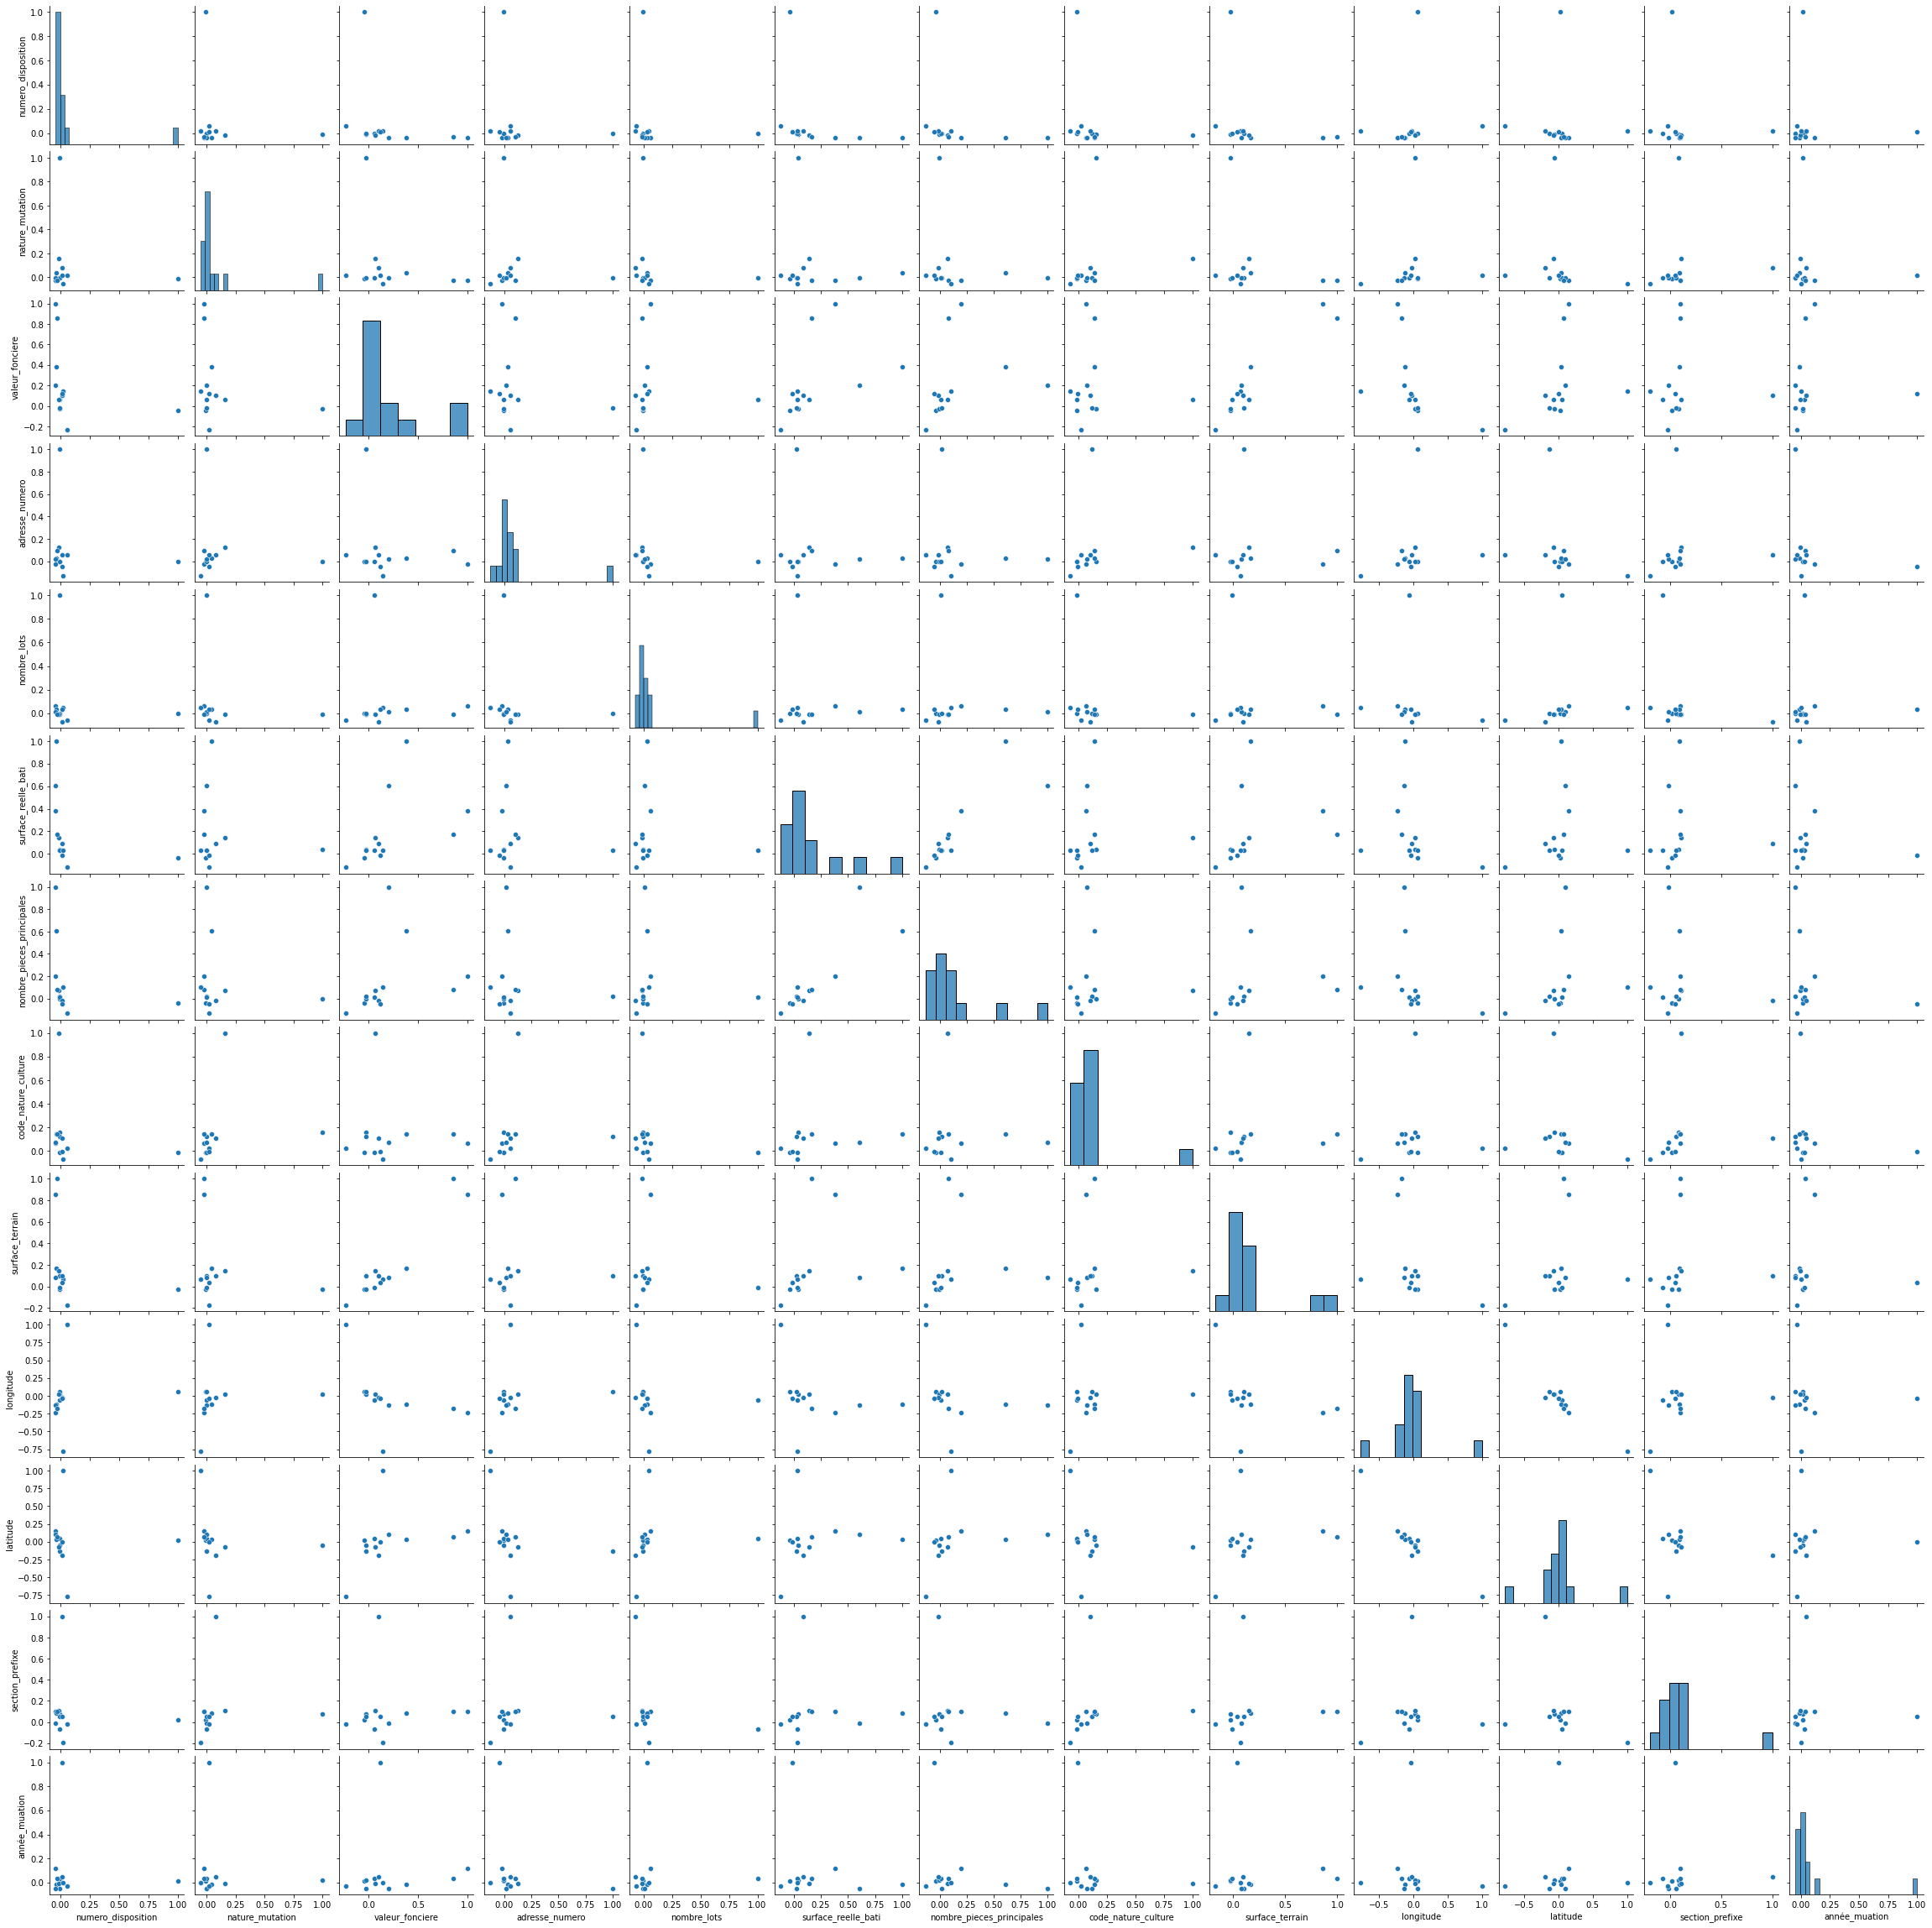

In [156]:
#onn affiche les corrélation et les plots entre les descripteurs 
sns.pairplot(maison.corr())

<AxesSubplot:>

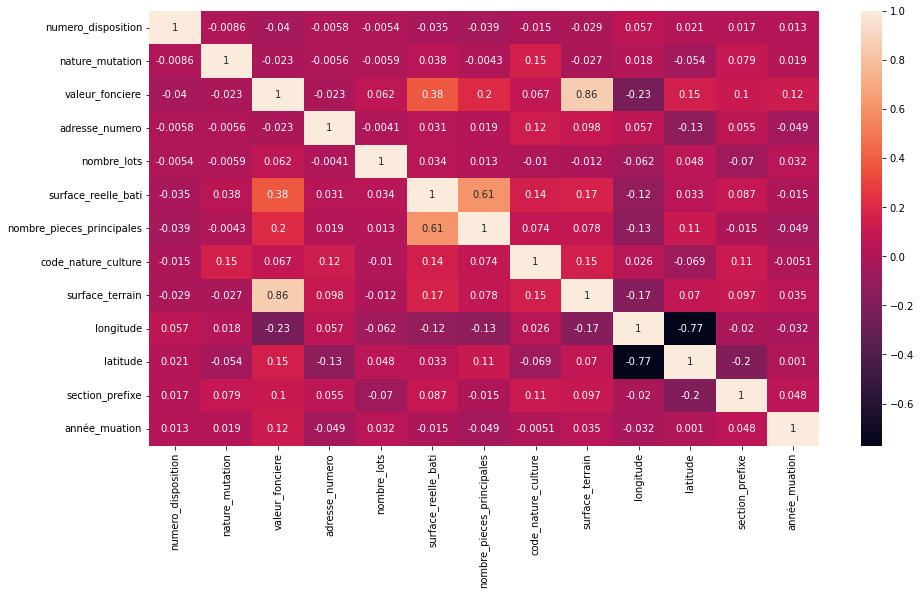

In [157]:
plt.figure(figsize=(15,8))
sns.heatmap(maison.corr(),annot=True)

## Remarque :
maintenant on remarque une correlations plus logique avec le target(valeur foncieére) et  le nombre de pieces , surface terrain et surface batiment .

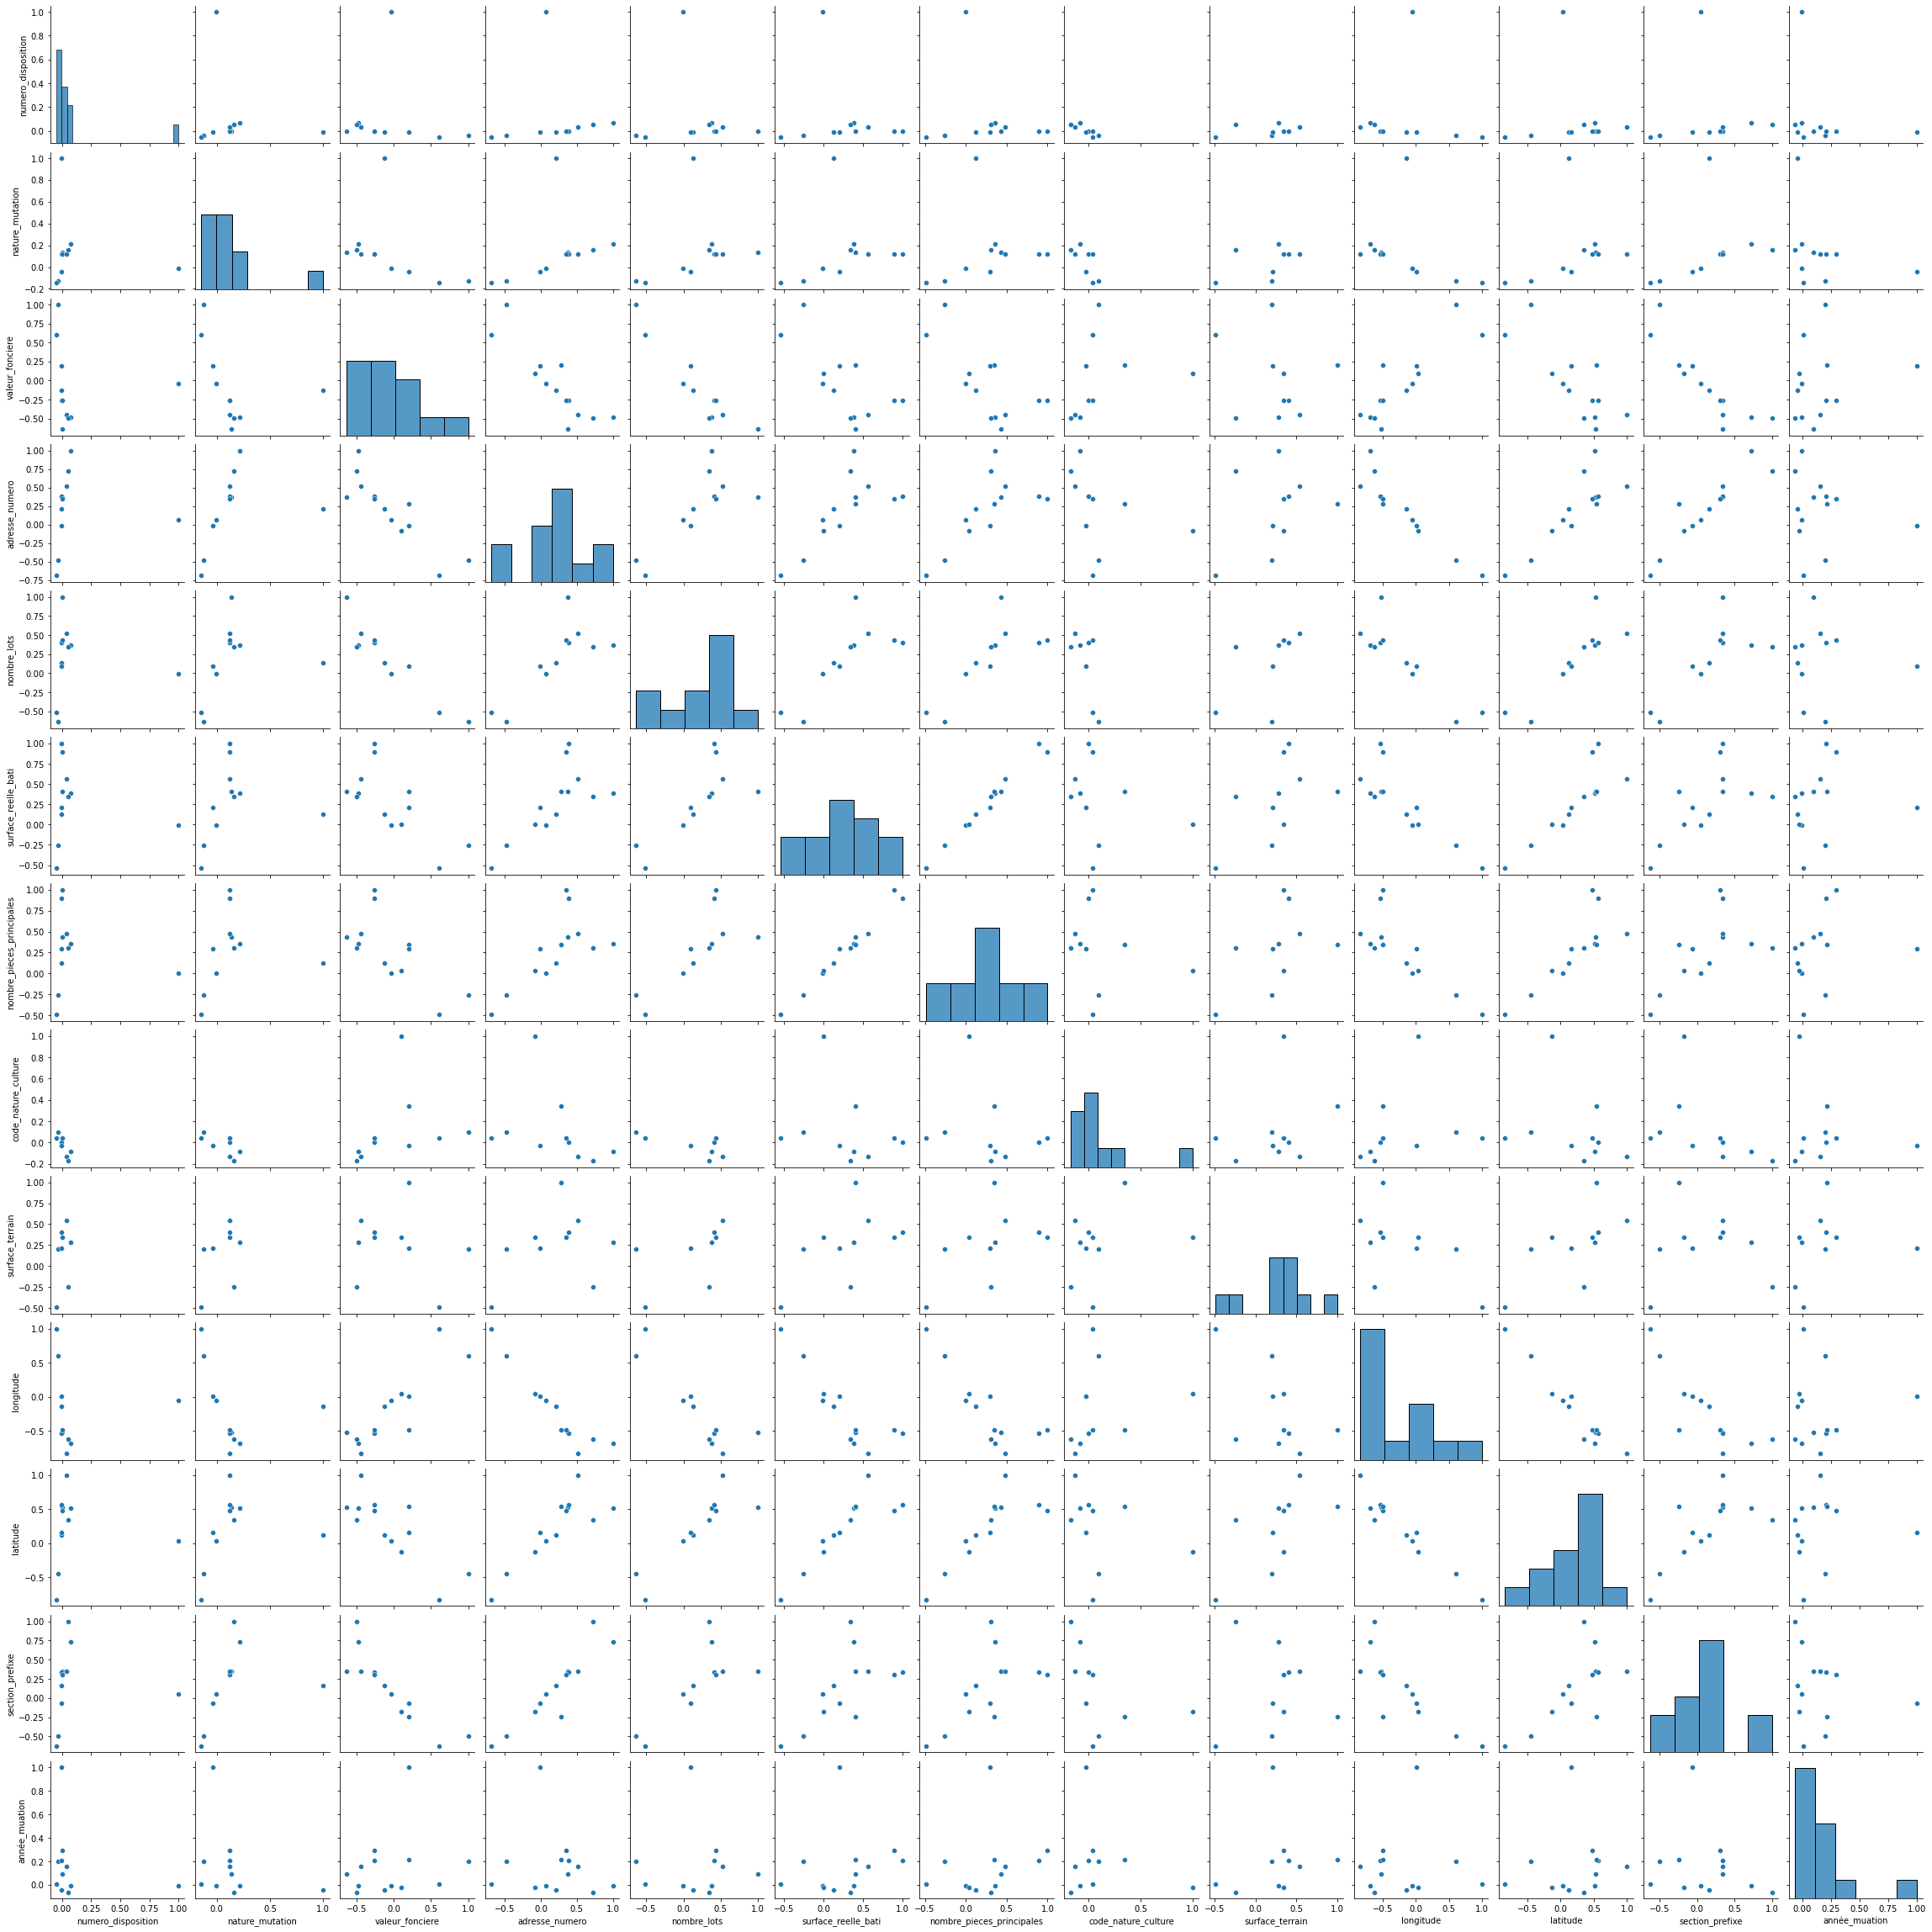

In [158]:
#on affiche les corrélation et les plots entre les descripteurs 
sns.pairplot(appartement.corr())

<AxesSubplot:>

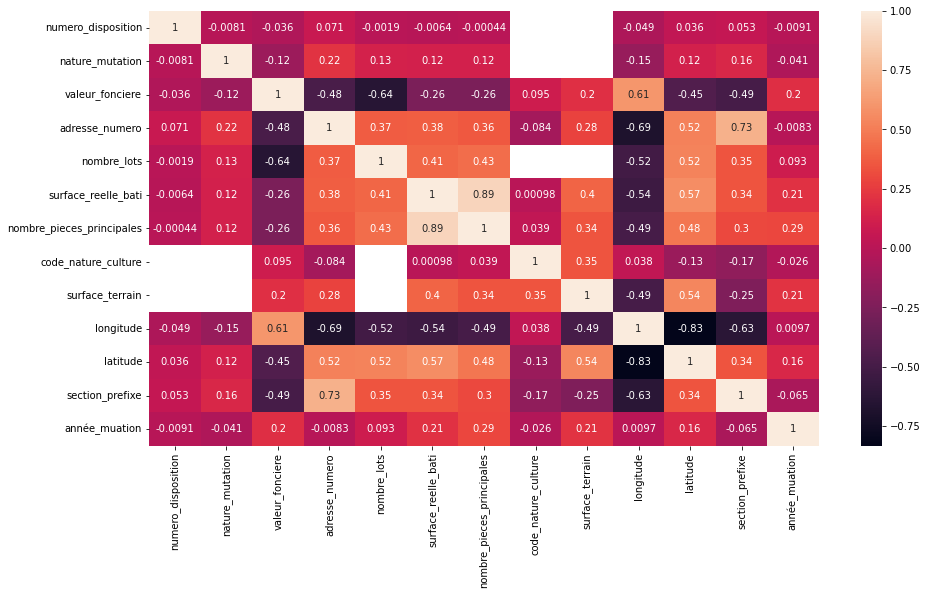

In [159]:
plt.figure(figsize=(15,8))
sns.heatmap(appartement.corr(),annot=True)

## Remarque :
Ici remarque une correlations qui n'es pas logique avec le target(valeur foncieére) et  le nombre de pieces , surface terrain et surface batiment .les données d'appartement semble peu fiable.

<AxesSubplot:>

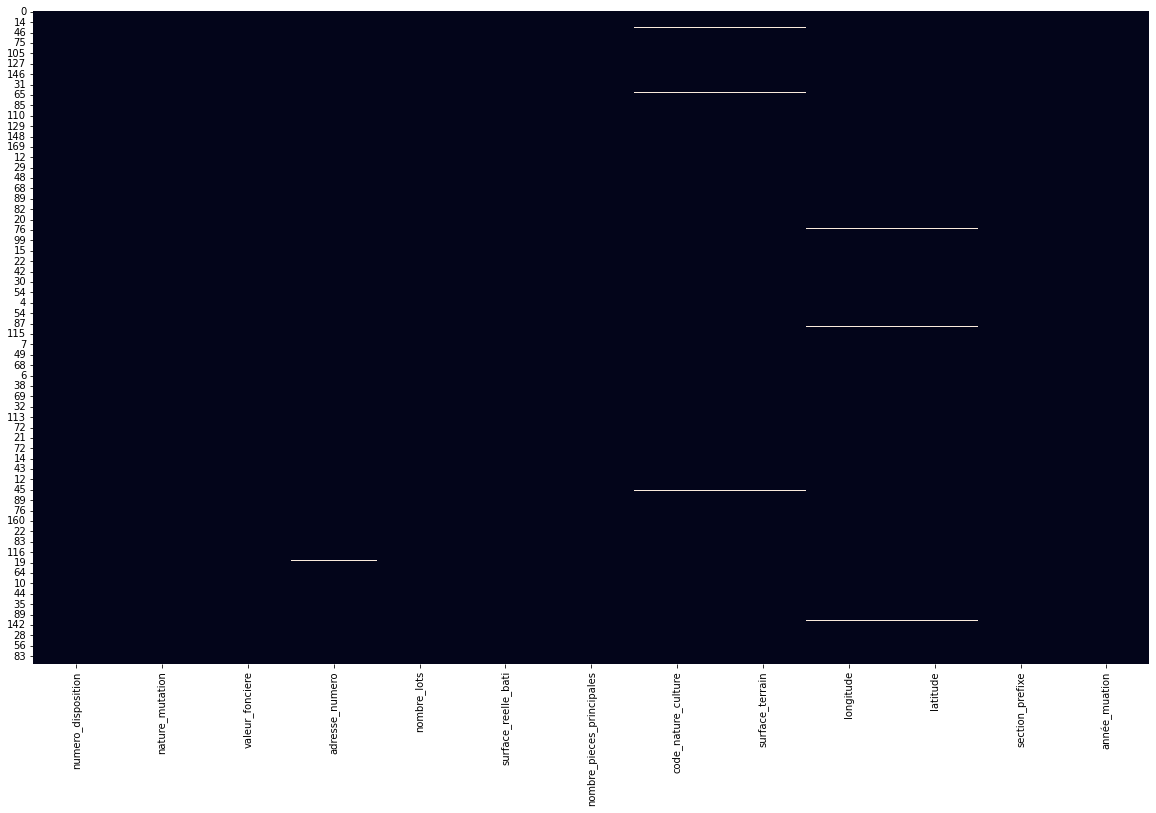

In [160]:
#on vsualise les valeur qui sont à non dans chaque colonne
plt.figure(figsize=(20,12))
sns.heatmap(maison.isna(),cbar=False)

# Le dataframe Maison

In [161]:
#On supprime les descripteurs avec les quels la corrélation est faible
df_mai=maison.drop(columns=['code_nature_culture','numero_disposition','nature_mutation','nombre_lots','longitude','latitude','adresse_numero','année_muation'], axis=1)
df_mai = df_mai.drop(df_mai[df_mai['valeur_fonciere'] <1000].index)
df_mai=df_mai.dropna()
df_mai.shape

(1062, 5)

## 1) le model de regression linéaire 

In [162]:



# Génération de données de test
X = df_mai.drop(columns=['valeur_fonciere'], axis=1)

y = df_mai['valeur_fonciere']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Création du modèle de régression linéaire

reg = LinearRegression()
# Entraînement du modèle
reg.fit(X_train,y_train)


LinearRegression()

In [163]:
#on affiche le score
reg.score(X_test, y_test)

0.37464470761229174

## 2)le model de regression polynomiale pour la data frame maison

In [164]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



# Génération de données de test
X = df_mai.drop(columns=['valeur_fonciere'], axis=1)
y = df_mai['valeur_fonciere']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
# Création de l'objet PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,interaction_only=True)



# Transformation des caractéristiques en un jeu de caractéristiques polynomiales
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

# Création du modèle de régression linéaire
regressor = LinearRegression()

# Entraînement du modèle
regressor.fit(X_poly_train, y_train)

# Prédiction des valeurs pour X
y_pred = regressor.predict(X_poly_test)



In [165]:
score = regressor.score(X_poly_test, y_test)
print(score)

0.7307242167422063


In [166]:
#les coefficient de nos variables
regressor.coef_

array([ 0.00000000e+00,  1.56556876e+03,  1.95966722e+04,  8.98006888e+01,
        7.65267056e+01, -1.36436233e+02,  6.31053297e-01,  6.08622895e+00,
       -2.27808753e+01, -1.47887928e+02,  2.44993526e-01])

In [167]:
#la constante à ajouter
regressor.intercept_

-19587.326479585405

## l'equation pour le prix d'une maison

In [168]:
coef = [ 0.00000000e+00,  1.56556876e+03,  1.95966722e+04,  8.98006888e+01,
        7.65267056e+01, -1.36436233e+02,  6.31053297e-01,  6.08622895e+00,
       -2.27808753e+01, -1.47887928e+02,  2.44993526e-01]
constant = -19587.326479585405

def prix_maison(surf_bat, nb_piece, surf_terrain, section, coef, constant):
    y= constant + coef[0]+coef[1]*surf_bat+coef[2]*nb_piece+coef[3]*surf_terrain+coef[4]*section + coef[5]*surf_bat*nb_piece+coef[6]*surf_bat*surf_terrain+coef[7]*surf_bat*section + coef[8]*nb_piece*surf_terrain+coef[9]*nb_piece*section + coef[10]*surf_terrain*section
    return y

### Test

In [169]:
prix_maison(80,5,462,8,coef, constant)

160752.24738503058

## 3) model avec regression Lasso

In [170]:
# séparer les features (X) et la cible (y)
X = df_mai.drop(columns=['valeur_fonciere'], axis=1)
y = df_mai['valeur_fonciere']

# séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# créer un modèle de régression Lasso
lasso = Lasso(alpha=0.1)

# entraîner le modèle sur les données d'entraînement
lasso.fit(X_train, y_train)

# faire des prédictions sur les données de test
y_pred = lasso.predict(X_test)

In [171]:
score = lasso.score(X_test, y_test)
print(f"Le score du modèle est {score:.2f}.")

Le score du modèle est 0.29.


## 4) la cross validation

In [172]:
# Définition du nombre de plis
n_folds = 3

# Création de l'objet KFold
kf = KFold(n_splits=n_folds)

# Initialisation des listes pour stocker les scores
scores = []
mse_scores = []

for train_index, test_index in kf.split(X):
    # Séparation des données en pli d'entraînement et de test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Transformation des caractéristiques en un jeu de caractéristiques polynomiales
    X_train_poly = poly_features.transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Entraînement du modèle
    regressor.fit(X_train_poly, y_train)

    # Prédiction des valeurs pour X_test
    y_pred = regressor.predict(X_test_poly)

    # Calcul du score et de l'erreur quadratique moyenne pour ce pli
    score = regressor.score(X_test_poly, y_test)
    scores.append(score)

    

# Calcul de la moyenne des scores et des erreurs quadratiques moyennes
mean_score = np.mean(scores)
mean_mse = np.mean(mse_scores)

print("Score moyen:", scores)


Score moyen: [0.16530756110167188, 0.4478433258983763, 0.83824470683344]


C:\Users\Briane\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Briane\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# la data frame appartement

In [173]:
#On supprime les descripteurs avec les quels la corrélation est faible
df_app=appartement.drop(columns=['surface_terrain','code_nature_culture','numero_disposition','nombre_lots','année_muation','nature_mutation','adresse_numero','latitude','longitude'], axis=1)
df_app = df_app.drop(df_app[df_app['valeur_fonciere'] <1000].index)
df_app=df_app.dropna()
df_app.shape

(374, 4)

<AxesSubplot:>

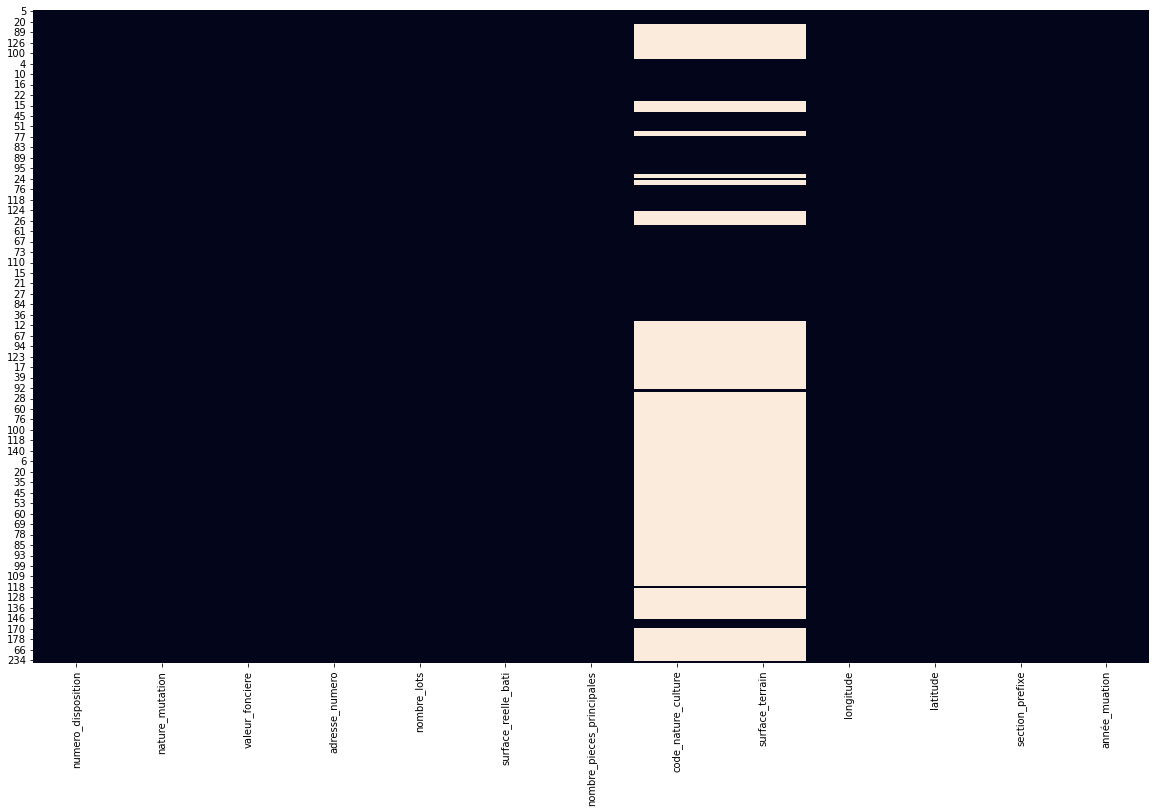

In [174]:
#on vsualise les valeur qui sont à non dans chaque colonne
plt.figure(figsize=(20,12))
sns.heatmap(appartement.isna(),cbar=False)

## 1)le model de regression linéaire pour

In [175]:
# Génération de données de test
X = df_app.drop(columns=['valeur_fonciere'], axis=1)
y = df_app['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Création du modèle de régression linéaire
reg = LinearRegression()

# Entraînement du modèle
reg.fit(X_train,y_train)


LinearRegression()

In [176]:
reg.score(X_test, y_test)

0.2698081338662085

## 2)le model de regression polynomiale pour la data frame appartement

In [177]:

# Génération de données de test
X = df_app.drop(columns=['valeur_fonciere'], axis=1)
y = df_app['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
# Création de l'objet PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,interaction_only=True)


# Transformation des caractéristiques en un jeu de caractéristiques polynomiales
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)
print(X_poly_test[0])
print((X_test.iloc[0,:]))
# Création du modèle de régression linéaire
regressor = LinearRegression()

# Entraînement du modèle
regressor.fit(X_poly_train, y_train)

# Prédiction des valeurs pour X
y_pred = regressor.predict(X_poly_test)


[  1.  67.   3.  13. 201. 871.  39.]
surface_reelle_bati          67.0
nombre_pieces_principales     3.0
section_prefixe              13.0
Name: 59, dtype: float64


In [178]:
score = regressor.score(X_poly_test, y_test)
print(score)

0.2354035353691858


In [179]:
#les coefficient de nos variables
regressor.coef_

array([ 0.00000000e+00,  3.32656511e+03, -2.47891337e+04, -2.49033260e+04,
       -1.10055465e+03, -6.34467833e+00,  3.66451410e+03])

In [180]:
#la constante à ajouter
regressor.intercept_

596167.5011129292

### l'equation pour le prix d'un appartement 

In [181]:
coef = [ 0.00000000e+00,  3.32656511e+03, -2.47891337e+04, -2.49033260e+04,
       -1.10055465e+03, -6.34467833e+00,  3.66451410e+03]
constant = 596167.5011129292

def prix_appartement(surf_bat, nb_piece, section, coef, constant):
    y= constant + coef[0]+coef[1]*surf_bat+coef[2]*nb_piece+coef[3]*section+coef[4]*surf_bat*nb_piece+coef[5]*surf_bat*section +coef[6]*nb_piece*section
    return y

## 3)Cross validation

In [182]:
# Définition du nombre de plis
n_folds = 5

# Création de l'objet KFold
kf = KFold(n_splits=n_folds)

# Initialisation des listes pour stocker les scores
scores = []
mse_scores = []

for train_index, test_index in kf.split(X):
    # Séparation des données en pli d'entraînement et de test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Transformation des caractéristiques en un jeu de caractéristiques polynomiales
    X_train_poly = poly_features.transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Entraînement du modèle
    regressor.fit(X_train_poly, y_train)

    # Prédiction des valeurs pour X_test
    y_pred = regressor.predict(X_test_poly)

    # Calcul du score et de l'erreur quadratique moyenne pour ce pli
    score = regressor.score(X_test_poly, y_test)
    scores.append(score)
    

# Calcul de la moyenne des scores et des erreurs quadratiques moyennes
mean_score = np.mean(scores)


print("Score moyen:", scores)




Score moyen: [-2.276545721562317, -0.3984096909341017, 0.0365017772055678, -12.645822762495472, -0.5530697135542479]


## 4) model avec regression Lasso

In [183]:
# séparer les features (X) et la cible (y)
X = df_app.drop(columns=['valeur_fonciere'], axis=1)
y = df_app['valeur_fonciere']

# séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# créer un modèle de régression Lasso
lasso = Lasso(alpha=0.1)

# entraîner le modèle sur les données d'entraînement
lasso.fit(X_train, y_train)

# faire des prédictions sur les données de test
y_pred = lasso.predict(X_test)

In [184]:
score = lasso.score(X_test, y_test)
print(f"Le score du modèle est {score:.2f}.")

Le score du modèle est 0.22.


# Conclusion :
## Maison :
 Target= valeur fonciere. 
 Descripteurs =[surfacre reeal_bati,surface_terrain,nombre de piéce,section prefixe]
 .Les prediction avec la regression polynomiale pour les maison sont plus fiable ,j'ai recépuré les coeficients et les constantes pour faire l'equation pour estimer le prix de la maison.
## Appartement:
 target= valeur fonciere.  
 Descripteurs =[surfacre reeal_bati,nombre de piéce,section prefixe]
 .On a pas de bon résultats avec appartement peut être c'est dû au manque de données .On a choisis les prediction avec la regression polynomiale qui affichait les meileurs résultats.J'ai recépuré les coeficients et les constantes pour faire l'equation pour estimer le prix de 'appartement.
 